In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.HAPT)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-19 13:34:33,754 - whar-datasets - INFO - Running DownloadingStep
2026-02-19 13:34:33,755 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-19 13:34:33,755 - whar-datasets - INFO - Hash is up to date
2026-02-19 13:34:33,756 - whar-datasets - INFO - Running ParsingStep
2026-02-19 13:34:33,756 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-19 13:34:33,757 - whar-datasets - INFO - Hash is up to date
2026-02-19 13:34:33,757 - whar-datasets - INFO - Running WindowingStep
2026-02-19 13:34:33,757 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-19 13:34:33,758 - whar-datasets - INFO - Hash is up to date
2026-02-19 13:34:33,758 - whar-datasets - INFO - Loading windowing
2026-02-19 13:34:33,768 - whar-datasets - INFO - activity_ids from 0 to 11
2026-02-19 13:34:33,768 - whar-datasets - INFO - subject_ids from 0 to 29


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 8433 2108 367
subject_1 8468 2116 324
subject_2 8440 2110 358
subject_3 8459 2114 335
subject_4 8468 2117 323
subject_5 8453 2113 342
subject_6 8472 2118 318
subject_7 8492 2122 294
subject_8 8479 2119 310
subject_9 8482 2120 306
subject_10 8457 2114 337
subject_11 8455 2113 340
subject_12 8448 2112 348
subject_13 8450 2112 346
subject_14 8447 2111 350
subject_15 8426 2106 376
subject_16 8406 2101 401
subject_17 8406 2101 401
subject_18 8425 2106 377
subject_19 8420 2105 383
subject_20 8380 2094 434
subject_21 8459 2114 335
subject_22 8414 2103 391
subject_23 8400 2099 409
subject_24 8380 2094 434
subject_25 8400 2099 409
subject_26 8412 2102 394
subject_27 8411 2102 395
subject_28 8436 2108 364
subject_29 8401 2100 407


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-19 13:34:33,854 - whar-datasets - INFO - Running SamplingStep
2026-02-19 13:34:33,855 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-19 13:34:33,857 - whar-datasets - INFO - Hash is not up to date
2026-02-19 13:34:35,373 - whar-datasets - INFO - Computing samples
2026-02-19 13:34:35,373 - whar-datasets - INFO - Getting normalization parameters
2026-02-19 13:34:35,556 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 5.69 ss


2026-02-19 13:34:41,499 - whar-datasets - INFO - Saving samples
2026-02-19 13:34:41,585 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

10908


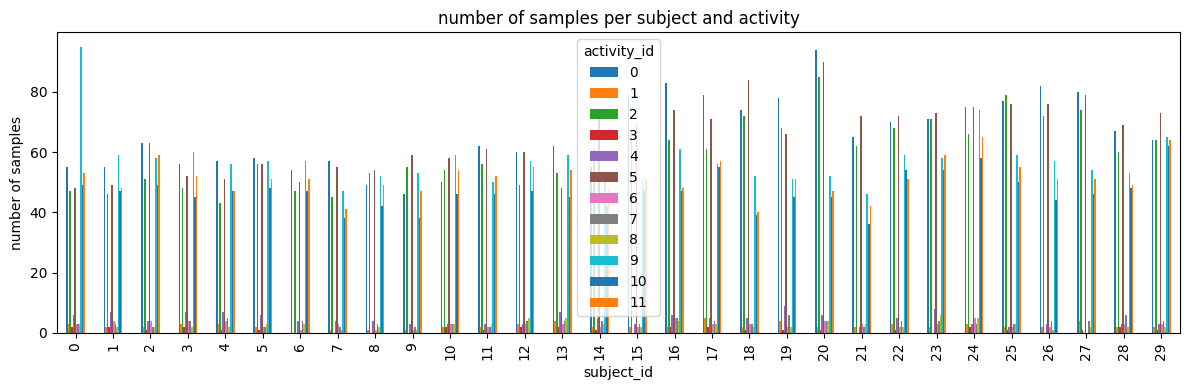

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 5, Subject: 16')

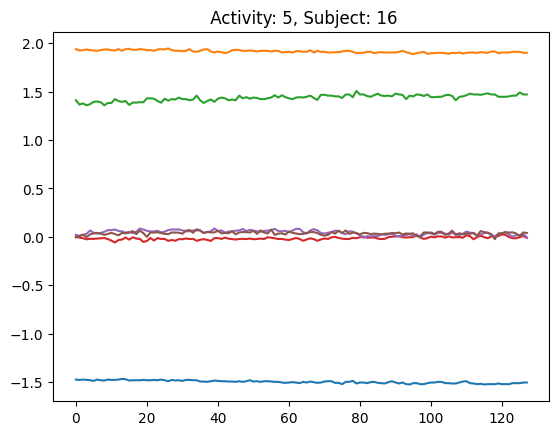

In [33]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")